In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = pd.read_csv('/content/movie.csv')
column_names = ['Reviews','Rating']
df.columns = column_names
df.head()

df.info()
df.describe()

df.isnull().sum()

import nltk

# Download tokenizer and lemmatizer data
nltk.download('punkt')         # for word_tokenize
nltk.download('stopwords')     # for stopword removal
nltk.download('wordnet')

import re

# Minimal stopword list (you can expand it later)
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "you", "your", "yours", "he", "she", "they",
    "them", "their", "this", "that", "am", "is", "are", "was", "were", "be", "been",
    "have", "has", "had", "do", "does", "did", "a", "an", "the", "and", "but", "if",
    "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "to", "from", "up", "down", "in", "out", "on", "off", "over"
])

# Preprocessing function without NLTK
def simple_preprocess(text):
    text = text.lower()  # lowercase
    tokens = re.findall(r'\b\w+\b', text)  # split into words (only a-z, 0-9)
    clean_tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return clean_tokens

# Apply to the 'Reviews' column
df['tokens'] = df['Reviews'].apply(simple_preprocess)

# Preview
df[['Reviews', 'tokens']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  40000 non-null  object
 1   Rating   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Reviews,tokens
0,I grew up (b. 1965) watching and loving the Th...,"[grew, b, 1965, watching, loving, thunderbirds..."
1,"When I put this movie in my DVD player, and sa...","[when, put, movie, dvd, player, sat, coke, som..."
2,Why do people who do not know what a particula...,"[why, people, who, not, know, what, particular..."
3,Even though I have great interest in Biblical ...,"[even, though, great, interest, biblical, movi..."
4,Im a die hard Dads Army fan and nothing will e...,"[im, die, hard, dads, army, fan, nothing, will..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into text
df['clean_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # optional: adjust max_features

# Fit and transform
X = vectorizer.fit_transform(df['clean_text'])

# Target variable (assuming 0 = negative, 1 = positive)
y = df['Rating']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88975

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      3966
           1       0.89      0.90      0.89      4034

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



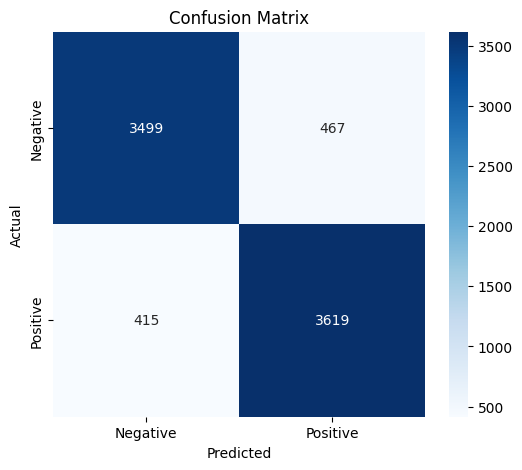

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
